In [2]:
import numpy as np
import matplotlib.pyplot as plt
from polyleven import levenshtein

In [3]:
def sample_trajs(actions, n):
    '''
    Sample all possible trajectories of length n from a set of actions.
    '''
    trajs= [[]]
    done=False
    while not done:
        new_trajs = []
        for traj in trajs:
            if len(''.join(traj)) < n:
                for action in actions:
                    if len(''.join(traj)+action) <= n:
                        new_trajs.append(traj+[action])
            else:
                new_trajs.append(traj) 
        trajs = new_trajs
        done = all(len(''.join(traj)) == n for traj in trajs)
    if done:
        return trajs

In [4]:
def get_logrewards(trajs, sequence):
    rews=[]
    for traj in trajs:
        seq = ''.join(traj)
        rews.append(-levenshtein(seq, sequence))
    return rews


mean atomic logrew -6.538718969097698 mean chunk logrew -6.442739543196164


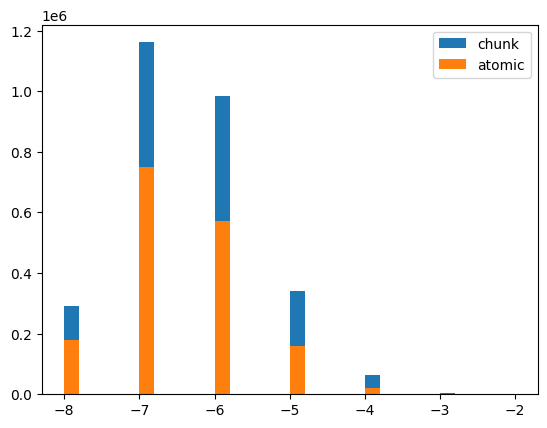

In [5]:
sequence='abcdefgh'
n=len(sequence)
atomic_actions = [ 'a','b','c' , 'd', 'e', 'f' ]
actions = atomic_actions +   ['ab','cd','ef']
atomic_trajs = sample_trajs(atomic_actions, n)
trajs=sample_trajs(actions, n)
logrews_atomic = get_logrewards(atomic_trajs, sequence)
logrews = get_logrewards(trajs, sequence)
plt.hist(logrews, bins=30, label='chunk')
plt.hist( logrews_atomic , bins=30, label='atomic')
plt.legend()
print('mean atomic logrew', np.mean(logrews_atomic),'mean chunk logrew' , np.mean(logrews))